In [170]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import astropy
from astropy.io import fits, ascii
from astropy.table import Table, Column
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm
import seaborn as sns
sns.set_style("white")
import pandas as pd
import scipy

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
hdulist1 = fits.open('NEWFIRM_NGC6334_BrG_121as.fits')
hdulist2 = fits.open('I1_hdr_good.fits')

In [10]:
im_BrG = hdulist1[0].data
im_I1 = hdulist2[0].data

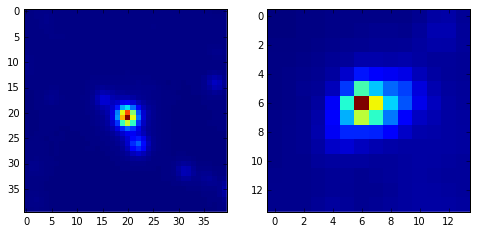

In [20]:
plt.subplots(1,2,figsize=(8,12))
plt.subplot(1,2,1)
plt.imshow(im_BrG[3820:3860,1980:2020], interpolation='None')
plt.subplot(1,2,2)
plt.imshow(im_I1[2247:2261,2951:2965], interpolation='None')

In the image to the right (IRAC1), the centroids of the sources seen in the left image (NEWFIRM) are located in pixel coordinates $(2254,2958)$, $(2253,2961)$, and $(2256,2957)$

(11635, 2)


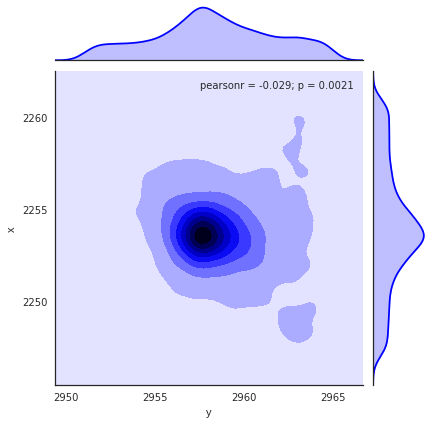

In [237]:
all_coords_x = []
all_coords_y = []
cov = [[0.72,0],[0,0.72]]  # From the PSF of Spitzer IRAC1
mean1 = [2254.222,2958.250]
mean2 = [2253.369,2960.640]
mean3 = [2256.189,2956.580]





for i in range(2247,2261):
    for j in range(2951,2965):
        w = scipy.stats.multivariate_normal.pdf(np.array([i,j]),mean1,cov) 
        + scipy.stats.multivariate_normal.pdf(np.array([i,j]),mean2,cov) 
        + scipy.stats.multivariate_normal.pdf(np.array([i,j]),mean3,cov)
        #for k in arange(5*w*int((im_I1[i,j]/1.0)-42)):
        for k in arange(int((im_I1[i,j]/1.0)-0)):   
            coord_pair = random.uniform(0.0,1.0,2)
            coord_x,coord_y = i+coord_pair[0],j+coord_pair[1]
            all_coords_x.append(coord_x)
            all_coords_y.append(coord_y)
            
            
#plt.scatter(all_coords_x,all_coords_y,marker=".")
all_coords = transpose([all_coords_x,all_coords_y])
print shape(all_coords)

df = pd.DataFrame(all_coords,columns=["x","y"])

cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

g = sns.jointplot(x="y", y="x", data=df, kind="kde", color="b")
#g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
#g.ax_joint.collections[0].set_alpha(0)
    
#print random.uniform(0.0,1.0,2)

In [238]:
clf = GMM(n_components=3,covariance_type='spherical',init_params='wc',)
clf.means_ =  
clf.fit(all_coords)

GMM(covariance_type='spherical', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

(2246.279438758635, 2261.7221762936733, 2950.2762143332575, 2965.7240185424748)

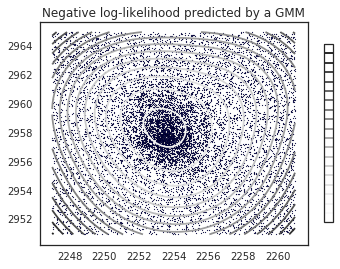

In [239]:
# display predicted scores by the model as a contour plot
x = np.linspace(2247,2261)
y = np.linspace(2951,2965)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)[0]
Z = Z.reshape(X.shape)

#CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=24./4., vmax=558./4.),
                 #levels=np.logspace(log10(24./4), log10(558./4.), 10))
CS = plt.contour(X, Y, Z,norm=LogNorm(vmin=4., vmax=10.),levels=np.logspace(log10(4.0), log10(10.0), 20)) 
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(all_coords[:, 0], all_coords[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')


**IDEA:** Use the coordinates in the resolved image to sample normal distributions instead of uniform distribution, and combine with pixel counts in the unresolved image to come up with a more realistic distribution of points.

In [219]:
print clf.weights_
print clf.means_
print clf.covars_

[ 0.88185795  0.05028465  0.0678574 ]
[[ 2254.2882485   2958.45143313]
 [ 2252.10198645  2960.36560184]
 [ 2256.12337954  2960.2151886 ]]
[[ 0.60204229  0.60204229]
 [ 6.78656972  6.78656972]
 [ 7.65292928  7.65292928]]


**Different attempt:** Generate observations of three equally weighted Gaussians centered on the resolved centroids, the scale them pixel by pixel using the counts of the unresolved image.

In [167]:
n_samples = 1000

# generate random sample, three components
np.random.seed(0)

# generate three spherical gaussians

cov = [[0.72,0],[0,0.72]]  # From the PSF of Spitzer IRAC1

# Source1
mean1 = [2254.222,2958.250]
source1 = np.random.multivariate_normal(mean1,cov,n_samples)
source1 = transpose(source1)

# Source2
mean2 = [2253.369,2960.640]
source2 = np.random.multivariate_normal(mean2,cov,n_samples)
source2 = transpose(source2)

# Source3
mean3 = [2256.189,2956.580]
source3 = np.random.multivariate_normal(mean3,cov,n_samples)
source3 = transpose(source3)


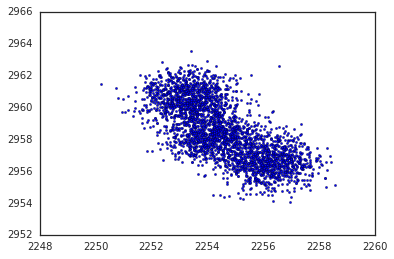

In [168]:
plt.scatter(source1[0],source1[1],marker='.')
plt.scatter(source2[0],source2[1],marker='.')
plt.scatter(source3[0],source3[1],marker='.')


In [172]:
x = [1.,2.]
scipy.stats.multivariate_normal.pdf(x,[1.,1],[[1.,0],[0.,1.]])

0.096532352630053928